In [3]:
pwd

'/home/wsuser/work'

In [4]:
!pip install keras==2.2.4
!pip install tensorflow==2.6.0


  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.4 which is incompatible.
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [5]:
#import image datagenerator library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_5818e866716f43f6a6ff04e1a3897f13 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_5818e866716f43f6a6ff04e1a3897f13 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_5818e866716f43f6a6ff04e1a3897f13 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XmpH_e35jGLlF8ofBTvBWUPmB-QiFW1IxMREgIz4TmmZ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_5818e866716f43f6a6ff04e1a3897f13)

streaming_body_1 = client_5818e866716f43f6a6ff04e1a3897f13.get_object(Bucket='garbageclassification-donotdelete-pr-cp9nsvw8jd5cnz', Key='dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [9]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [10]:
pwd

'/home/wsuser/work'

In [11]:
import os
filename = os.listdir(r'/home/wsuser/work/dataset/trainset')

In [12]:
train_transform = train_datagen.flow_from_directory(r'/home/wsuser/work/dataset/trainset',
                                            target_size=(128,128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [13]:
test_transform = val_datagen.flow_from_directory(r'/home/wsuser/work/dataset/testset',
                                            target_size=(128,128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 600 images belonging to 6 classes.


In [14]:
#to define linear initializations import Sequential
from tensorflow.keras.models import Sequential
#To add layers import Dense
from tensorflow.keras.layers import Dense
# to create a convolution kernel import Convolution2D
from tensorflow.keras.layers import Convolution2D
# Adding Max pooling Layer
from tensorflow.keras.layers import MaxPooling2D
# Adding Flatten Layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [15]:
train_transform.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [16]:
# Initializing the model
model=Sequential()

In [17]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [18]:
model.add(Flatten()) 

In [19]:
model.output_shape

(None, 127008)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Adding 1st hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [22]:
model.add(Dense(kernel_initializer='uniform',activation='relu',units=68))

In [23]:
model.add(Dense(kernel_initializer='uniform',activation='softmax',units=6))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 150)               19051350  
_________________________________________________________________
dense_1 (Dense)              (None, 68)                10268     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 414       
Total params: 19,062,928
Trainable params: 19,062,928
Non-trainable params: 0
____________________________________________

In [28]:
res = model.fit_generator(train_transform,steps_per_epoch=2527//64,validation_steps=600//64,epochs=30,
                          validation_data=test_transform)

Epoch 1/30
39/39 [==============================] - 50s 1s/step - loss: 1.3818 - acc: 0.4543 - val_loss: 1.3453 - val_acc: 0.4531
Epoch 2/30
39/39 [==============================] - 51s 1s/step - loss: 1.2741 - acc: 0.4948 - val_loss: 1.1397 - val_acc: 0.5694
Epoch 3/30
39/39 [==============================] - 51s 1s/step - loss: 1.2076 - acc: 0.5294 - val_loss: 1.1995 - val_acc: 0.5295
Epoch 4/30
39/39 [==============================] - 51s 1s/step - loss: 1.1369 - acc: 0.5656 - val_loss: 1.1245 - val_acc: 0.5781
Epoch 5/30
39/39 [==============================] - 50s 1s/step - loss: 1.1059 - acc: 0.5968 - val_loss: 1.0327 - val_acc: 0.6076
Epoch 6/30
39/39 [==============================] - 51s 1s/step - loss: 1.0346 - acc: 0.6200 - val_loss: 1.0638 - val_acc: 0.5903
Epoch 7/30
39/39 [==============================] - 51s 1s/step - loss: 0.9873 - acc: 0.6366 - val_loss: 0.9136 - val_acc: 0.6771
Epoch 8/30
39/39 [==============================] - 52s 1s/step - loss: 0.9606 - acc: 0.65

In [29]:
model.save('Garbage1.h5')

In [32]:
!tar -zcvf image-classification-model_new.tgz Garbage1.h5

Garbage1.h5


In [33]:
ls -1

dataset/
Garbage1.h5
image-classification-model_new.tgz


In [34]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 36.6 MB/s eta 0:00:01


In [36]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"ogETU3cOL6QoM0gOnmpTo6Y0xsuFg763AizdXNGYWWLm"
}
client = APIClient(wml_credentials)

In [37]:
client = APIClient(wml_credentials)

In [43]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [44]:
space_uid = guid_from_space_name(client, 'imageclassification')
print("Space UID = " + space_uid)

Space UID = 5e8aca74-1b8b-4365-a9b4-e0da8850e635


In [45]:
client.set.default_space(space_uid)

'SUCCESS'

In [47]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [50]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [53]:
model_details = client.repository.store_model(model='image-classification-model_new.tgz' ,meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [54]:
model_id

'e9e58099-52bb-46b6-8968-bfbbec079bb7'

In [ ]:
client.repository.download(model_id, 'my_model.tar.gz')

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
model=load_model("Garbage.h5")

In [70]:
#import numpy library
import numpy as np
#import load_model method to load our saved model
from tensorflow.keras.models import load_model
#import image from keras.preprocessing
from tensorflow.keras.preprocessing import image
#loading our saved model file
model = load_model("Garbage1.h5")
img = image.load_img(r"F:\main project\Garbage-Classification\dataset\trainset\glass\glass17.jpg",
                     target_size=(128,128))

x=image.img_to_array(img) #converting in to array format

x=np.expand_dims(x,axis=0) #changing its dimensions as per our requirement 
#img_data=preprocess_input(x)
#img_data.shape

In [71]:
a=np.argmax(model.predict(x), axis=1)

In [72]:
index=['0', '1', '2', '3', '4','5']
result = str(index[a[0]])
result

'2'

In [41]:
import matplotlib.pyplot as plt

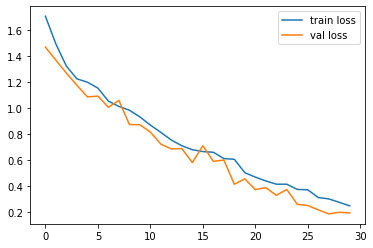

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

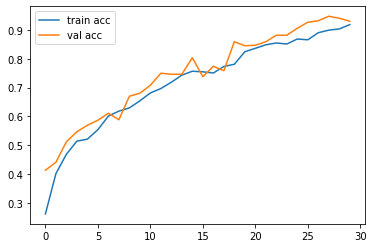

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the accuracy
plt.plot(res.history['acc'], label='train acc')
plt.plot(res.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')